In [2]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn import preprocessing
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [13]:
poi_pure = pd.read_csv('poi.csv')
poi_pure = poi_pure.query('location_wgs_84_lng > 120')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
poi_pure_geo = gpd.GeoDataFrame(poi_pure, geometry=gpd.points_from_xy(poi_pure.location_wgs_84_lng, poi_pure.location_wgs_84_lat))
poi_pure_geo

,ID,Name,Type_CN,Type_code,location_GCJ_lng,location_GCJ_lat,location_wgs_84_lng,location_wgs_84_lat,entr_location_GCJ_lng,entr_location_GCJ_lat,...,entr_location_wgs_84_lat,address,district,business_area,indoor_map,rating,cost,tag,district.1,geometry
0,B00155LA8A,中国石化云明加油站,汽车服务;加油站;中国石化,10101,121.482654,31.224726,121.478161,31.226696,121.482695,31.224878,...,31.226848,人民路888号,310101,城隍庙,0,NaN,7.0,NaN,310101,POINT (121.47816 31.22670)
1,B00155MFIK,中国石化泰石加油站,汽车服务;加油站;中国石化,10101,121.492001,31.208617,121.487543,31.210622,121.492095,31.208655,...,31.210660,国货路398-408号,310101,南浦大桥,0,NaN,7.0,NaN,310101,POINT (121.48754 31.21062)
2,B00151EAB4,中国石化中山南一路加油站,汽车服务;加油站;中国石化,10101,121.484732,31.200219,121.480249,31.202207,121.484872,31.200012,...,31.202000,中山南一路445号,310101,制造局路,0,NaN,7.0,NaN,310101,POINT (121.48025 31.20221)
3,B00155QC70,中国石油加油站,汽车服务;加油站;中国石油,10102,121.478140,31.204560,121.473634,31.206527,121.478188,31.204588,...,31.206555,蒙自路278号与斜土路交叉口,310101,五里桥,0,NaN,7.0,NaN,310101,POINT (121.47363 31.20653)
4,B001536A86,中国石化开城加油站,汽车服务;加油站;中国石化,10101,121.473624,31.194102,121.469104,31.196061,121.473632,31.194092,...,31.196051,龙华东路749号,310101,五里桥,0,NaN,7.0,NaN,310101,POINT (121.46910 31.19606)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589625,B001571NRD,上海金海纸业有限公司(西门),通行设施;临街院门;临街院正门,991401,121.642140,30.942729,121.637928,30.945052,NaN,NaN,...,NaN,头桥一支路28号,310120,中国(上海)自由贸易试验区临港新片区,0,NaN,NaN,NaN,310120,POINT (121.63793 30.94505)
589626,B00156GEOY,北港苑(东南门),通行设施;临街院门;临街院正门,991401,121.582561,30.929341,121.578375,30.931705,NaN,NaN,...,NaN,青村人民路445弄,310120,中国(上海)自由贸易试验区临港新片区,0,NaN,NaN,NaN,310120,POINT (121.57838 30.93170)
589627,B0FFGE61FB,棕榈滩海景城(北1门),通行设施;临街院门;临街院正门,991401,121.544716,30.823182,121.540467,30.825551,NaN,NaN,...,NaN,金汇塘东路1399弄,310120,中国(上海)自由贸易试验区临港新片区,0,NaN,NaN,NaN,310120,POINT (121.54047 30.82555)
589628,B0015716EM,上海海亮铜业公司(南门),通行设施;临街院门;临街院正门,991401,121.733333,30.947065,121.728981,30.949242,NaN,NaN,...,NaN,海亮铜业公司南门(海奕路北),310120,中国(上海)自由贸易试验区临港新片区,0,NaN,NaN,NaN,310120,POINT (121.72898 30.94924)


In [19]:
fishnet_graph = gpd.read_file('fishnet4900_shanghai.shp')
fishnet_graph = fishnet_graph.set_crs('epsg:4326')

,geometry
0,"POLYGON ((13498006.072 3592692.406, 13498006.0..."
1,"POLYGON ((13499783.695 3592692.406, 13499783.6..."
2,"POLYGON ((13501561.317 3592692.406, 13501561.3..."
3,"POLYGON ((13503338.940 3592692.406, 13503338.9..."
4,"POLYGON ((13505116.562 3592692.406, 13505116.5..."
...,...
2910,"POLYGON ((13503338.940 3697030.642, 13503338.9..."
2911,"POLYGON ((13505116.562 3697030.642, 13505116.5..."
2912,"POLYGON ((13506894.184 3697030.642, 13506894.1..."
2913,"POLYGON ((13508671.807 3697030.642, 13508671.8..."


In [21]:
poi_pure_geo.crs
poi_pure_geo = poi_pure_geo.set_crs('epsg:4326')

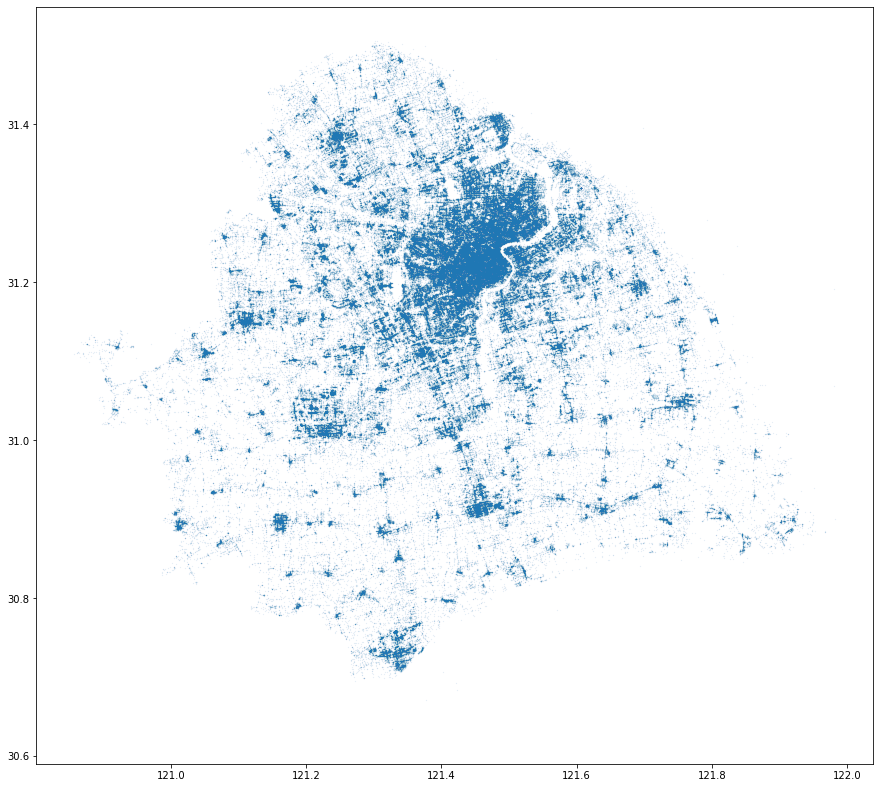

In [22]:
ax = poi_pure_geo.plot(figsize=(15,15), markersize=0.01, alpha=0.4)
# poi_pure_geo

对于POI密度 rescale， 防止密度对分类的影响？
对type进行分类 -》diversity in